# Sesame street


This notebook is a reproduction of the classic developmental psychology study on the Sesame Street tv show. 

For more details, see *G Is for Growing: Thirty Years of Research on Children and Sesame Street*
Routledge Communication Series
Editors	Shalom M. Fisch, Rosemarie T. Truglio

![alt text](Gisforgrowing.jpg)

The file sesame.csv contains data on an experiment which sought to learn
whether regularly watching Sesame Street caused an increase in cognitive skills, at least on average. The experiment consisted of randomly selecting some children, and encouraging them to watch the show, while others received no such encouragement. The children were tested before and after the
experimental period on a range of cognitive skills. (Table 1 lists the variables.)

![alt text](columns.jpg)

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_csv('sesame.csv')

In [185]:
df.set_index('id')

,site,sex,age,viewcat,setting,prebody,prelet,preform,prenumb,prerelat,preclasf,postbody,postlet,postform,postnumb,postrelat,postclasf,peabody,encour,regular
id,,,,,,,,,,,,,,,,,,,,
1,1,1,66,1,2,16,23,12,40,14,20,18,30,14,44,14,23,62,1,0
2,1,2,67,3,2,30,26,9,39,16,22,30,37,17,39,14,22,8,1,1
3,1,1,56,3,2,22,14,9,9,9,8,21,46,15,40,9,19,32,0,1
4,1,1,49,1,2,23,11,10,14,9,13,21,14,13,19,8,15,27,0,0
5,1,1,69,4,2,32,47,15,51,17,22,32,63,18,54,14,21,71,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,5,2,51,2,1,30,15,8,12,10,10,30,33,12,45,12,20,49,1,1
237,5,1,49,4,1,17,16,12,15,8,15,25,26,15,20,12,11,41,1,1
238,5,1,43,2,1,16,13,6,11,8,9,22,19,10,10,9,7,30,1,1


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         240 non-null    int64
 1   site       240 non-null    int64
 2   sex        240 non-null    int64
 3   age        240 non-null    int64
 4   viewcat    240 non-null    int64
 5   setting    240 non-null    int64
 6   prebody    240 non-null    int64
 7   prelet     240 non-null    int64
 8   preform    240 non-null    int64
 9   prenumb    240 non-null    int64
 10  prerelat   240 non-null    int64
 11  preclasf   240 non-null    int64
 12  postbody   240 non-null    int64
 13  postlet    240 non-null    int64
 14  postform   240 non-null    int64
 15  postnumb   240 non-null    int64
 16  postrelat  240 non-null    int64
 17  postclasf  240 non-null    int64
 18  peabody    240 non-null    int64
 19  encour     240 non-null    int64
 20  regular    240 non-null    int64
dtypes: int64(21)
mem

In [187]:
df.isna().sum()

id           0
site         0
sex          0
age          0
viewcat      0
setting      0
prebody      0
prelet       0
preform      0
prenumb      0
prerelat     0
preclasf     0
postbody     0
postlet      0
postform     0
postnumb     0
postrelat    0
postclasf    0
peabody      0
encour       0
regular      0
dtype: int64

In [188]:
df.describe()

,id,site,sex,age,viewcat,setting,prebody,prelet,preform,prenumb,...,preclasf,postbody,postlet,postform,postnumb,postrelat,postclasf,peabody,encour,regular
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,120.083333,2.600000,1.520833,51.525000,2.558333,1.404167,21.400000,15.937500,9.925000,20.854167,...,12.233333,25.258333,26.741667,13.737500,30.008333,11.679167,15.737500,46.466667,0.633333,0.775000
std,69.848561,1.246921,0.500610,6.281356,1.103785,0.491756,6.390893,8.536425,3.734186,10.684893,...,4.642416,5.500849,13.375176,4.001288,12.822572,2.996718,5.150644,16.038621,0.482902,0.418455
min,0.000000,1.000000,1.000000,34.000000,1.000000,1.000000,6.000000,1.000000,2.000000,1.000000,...,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
25%,59.750000,1.750000,1.000000,48.000000,2.000000,1.000000,17.000000,11.750000,8.000000,13.000000,...,9.000000,21.750000,15.000000,11.000000,19.000000,10.000000,11.000000,35.000000,0.000000,1.000000
50%,120.500000,3.000000,2.000000,52.000000,3.000000,1.000000,22.000000,14.000000,10.000000,19.000000,...,12.000000,27.000000,23.000000,14.000000,29.000000,12.000000,16.000000,42.000000,1.000000,1.000000
75%,180.250000,4.000000,2.000000,56.000000,4.000000,2.000000,26.000000,17.250000,12.000000,27.000000,...,15.000000,29.000000,39.250000,17.000000,41.250000,14.000000,20.000000,58.000000,1.000000,1.000000
max,240.000000,5.000000,2.000000,69.000000,4.000000,2.000000,32.000000,55.000000,19.000000,52.000000,...,24.000000,39.000000,63.000000,20.000000,54.000000,23.000000,24.000000,99.000000,1.000000,1.000000


In [189]:
df['deltabody'] = df['postbody'] - df['prebody']
df['deltalet'] = df['postlet'] - df['prelet']
df['deltanumb'] = df['postnumb'] - df['prenumb']
df['deltarelat'] = df['postrelat'] - df['prerelat']
df['deltaclasf'] = df['postclasf'] - df['preclasf']

In [190]:
df[['prelet', 'postlet', 'deltalet']]

,prelet,postlet,deltalet
0,23,30,7
1,26,37,11
2,14,46,32
3,11,14,3
4,47,63,16
...,...,...,...
235,15,33,18
236,16,26,10
237,13,19,6
238,16,35,19


In [191]:
df.describe()

,id,site,sex,age,viewcat,setting,prebody,prelet,preform,prenumb,...,postrelat,postclasf,peabody,encour,regular,deltabody,deltalet,deltanumb,deltarelat,deltaclasf
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,120.083333,2.600000,1.520833,51.525000,2.558333,1.404167,21.400000,15.937500,9.925000,20.854167,...,11.679167,15.737500,46.466667,0.633333,0.775000,3.858333,10.804167,9.154167,1.741667,3.504167
std,69.848561,1.246921,0.500610,6.281356,1.103785,0.491756,6.390893,8.536425,3.734186,10.684893,...,2.996718,5.150644,16.038621,0.482902,0.418455,5.072357,11.168132,9.695208,3.476149,4.478678
min,0.000000,1.000000,1.000000,34.000000,1.000000,1.000000,6.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,8.000000,0.000000,0.000000,-11.000000,-22.000000,-35.000000,-10.000000,-7.000000
25%,59.750000,1.750000,1.000000,48.000000,2.000000,1.000000,17.000000,11.750000,8.000000,13.000000,...,10.000000,11.000000,35.000000,0.000000,1.000000,0.750000,3.000000,3.000000,0.000000,0.000000
50%,120.500000,3.000000,2.000000,52.000000,3.000000,1.000000,22.000000,14.000000,10.000000,19.000000,...,12.000000,16.000000,42.000000,1.000000,1.000000,4.000000,9.000000,9.000000,2.000000,3.000000
75%,180.250000,4.000000,2.000000,56.000000,4.000000,2.000000,26.000000,17.250000,12.000000,27.000000,...,14.000000,20.000000,58.000000,1.000000,1.000000,7.000000,18.000000,15.000000,4.000000,7.000000
max,240.000000,5.000000,2.000000,69.000000,4.000000,2.000000,32.000000,55.000000,19.000000,52.000000,...,23.000000,24.000000,99.000000,1.000000,1.000000,23.000000,41.000000,33.000000,13.000000,14.000000


In [192]:
df[df['viewcat'] >=3]['deltalet'].mean()

15.53968253968254

In [193]:
df[df['viewcat'] >=3]['deltalet'].sem()

0.9951406245781623

In [194]:
df[df['viewcat'] < 3]['deltalet'].mean()

5.5701754385964914

In [195]:
df[df['viewcat'] < 3]['deltalet'].sem()

0.800943522380581

**The change in reading letter recognition among viewing categories**

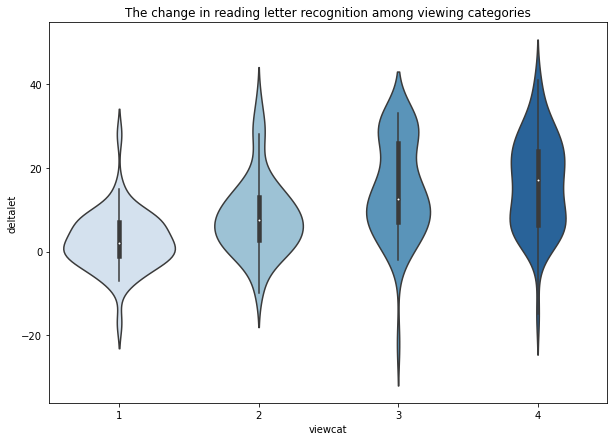

In [196]:
plt.figure(figsize=(10,7))
plt.title("The change in reading letter recognition among viewing categories")
sns.violinplot(data=df, x='viewcat', y='deltalet', palette='Blues');

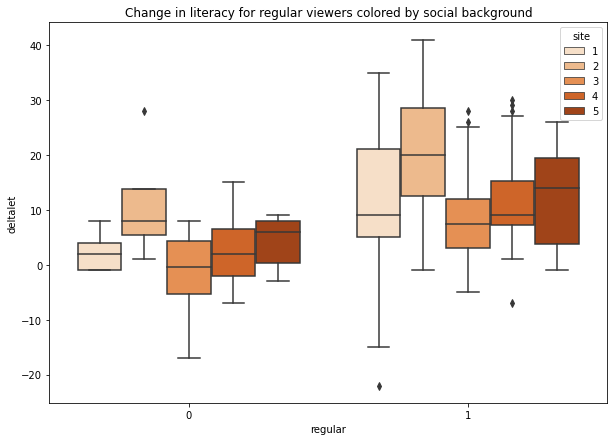

In [197]:
plt.figure(figsize=(10,7))
plt.title("Change in literacy for regular viewers colored by social background")
sns.boxplot(data=df, x='regular', y='deltalet', hue='site', palette='Oranges');

In [198]:
# We could bootstrap the data, but we don't really need to. I left this here from a previous version.
#upsample_df = df.sample(frac=10, replace=True, random_state=99)
#upsample_df

In [199]:
from scipy.stats import pearsonr, ttest_ind, kendalltau, f_oneway, norm

According to the pearsonr function there is a clear correlation between regular viewing and change in letter recognition.

In [200]:
pearsonr(df['deltalet'], df['regular'])

(0.4023740785500862, 9.366032497584664e-11)

Kendall's tau is a correlation measure for ordinal data. We can use this one for viewing category. (category 1 are the children who watched the least, and 4 the most).

**The kendalltau function says there is a strong correlation between viewing category and change in letter knowledge.**

In [201]:
kendalltau(df['deltalet'], df['viewcat'])

KendalltauResult(correlation=0.3865032268204643, pvalue=3.188674053565711e-15)

**Can we reject the null hypothesis? Are the two samples from the same distribution? Or the regular viewers have a higher literacy mean than the population?**

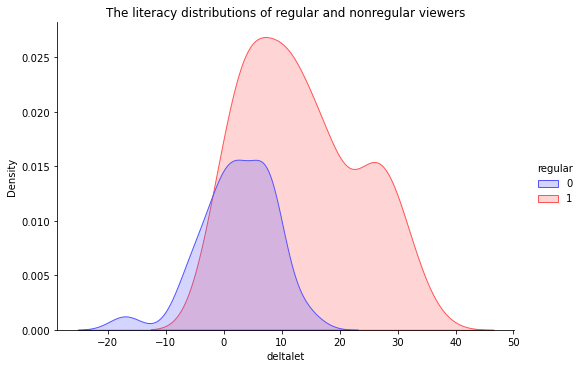

In [202]:
sns.displot(data=upsample_df, x='deltalet', hue='regular', kind='kde', fill=True, palette='seismic', height=5, aspect=1.5, legend=True)
plt.title("The literacy distributions of regular and nonregular viewers");

The kurtosis among regular viewers is not completely normal because it encompasses different viewing categories. As we've seen, the higher catagories give better results. There might be some diminishing returns after a while though.

In [203]:
mu_reg = df[df['regular'] == 1]['deltalet'].mean()   #Mean  regulars
sig_reg = df[df['regular'] == 1]['deltalet'].std() #sigma
n_reg = len(df[df['regular'] == 1]['deltalet']) #count

In [204]:
mu_noreg = df[df['regular'] == 0]['deltalet'].mean()  #Mean non regular watchers
sig_noreg= df[df['regular'] == 0]['deltalet'].std()
n_noreg = len(df[df['regular'] == 0]['deltalet'])

## The two sample t test

In [205]:
# our alpha value would be 0.05

mu_diff = mu_reg - mu_noreg    #hypothesized estimate 

#mu_diff_hyp = 0   #null hypothesis: difference of two means = zero

test_statistic = mu_diff / np.sqrt(((sig_reg**2)/n_reg)+((sig_noreg**2)/n_noreg))


print("Our t statistic for the two sample means: ", np.around(test_statistic, 3))

Our t statistic for the two sample means:  8.773


## The t-score is *very* high. We reject the null hypothesis. **It seems clear that regular viewing makes a difference.**

![alt text](tmonster.jpg)

In [206]:
pvalue = 2*norm.cdf(-np.abs(test_statistic))
round(pvalue, 4)


0.0

In [207]:
degfree = n_reg+n_noreg - 2
degfree

238

In [208]:
# This would be the scipy version
#ttest_ind(df[df['regular'] == 1]['deltalet'], df[df['regular'] == 0]['deltalet'], alternative='greater')

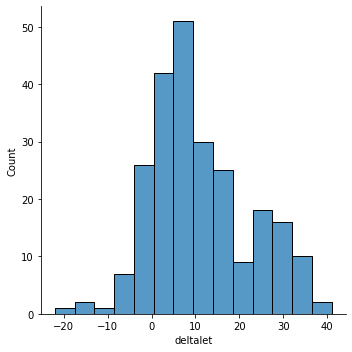

In [209]:
sns.displot(df['deltalet'])

In [210]:
# anova
first = df[df['viewcat'] <=2]['deltalet']
second = df[df['viewcat'] == 3]['deltalet']
third = df[df['viewcat'] == 4]['deltalet']
f_oneway(first, second, third)

F_onewayResult(statistic=29.77719977455154, pvalue=2.906102909805865e-12)

## Linear regression

We will also fit a linear regression model on the dataset, and we will check which coefficients give us the strongest signal.

In [211]:
X = df[['site',	'sex', 'age','setting', 'peabody', 'encour', 'regular', 'prebody', 'prelet', 'preform', 'prenumb', 'preclasf']]
#X = df[['site', 'setting',  'encour', 'regular']]

y = df['deltalet']

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=567)

In [214]:
model = LinearRegression()

In [215]:
model.fit(X_train,y_train)

LinearRegression()

In [216]:
test_predictions = model.predict(X_test)

In [217]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [218]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [219]:
df['deltalet'].std()

11.168132306655755

In [220]:
MAE

8.23040009144033

In [221]:
RMSE

10.119284646418603

In [222]:
test_res = y_test - test_predictions

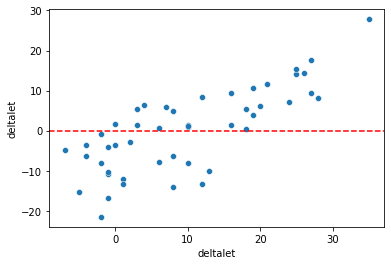

In [223]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

> In order to make valid inferences from your regression, the residuals of the regression should follow a normal distribution. The residuals are simply the error terms, or the differences between the observed value of the dependent variable and the predicted value.

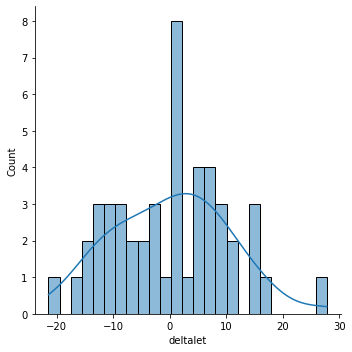

In [224]:
sns.displot(test_res,bins=25,kde=True)

In [225]:
model.coef_

array([-8.73335704e-01,  2.20712634e-01,  1.47718680e-01,  6.99363371e-01,
        1.56744720e-01,  2.27772997e+00,  6.16928305e+00,  4.07415070e-01,
       -5.48138550e-01,  4.07208246e-01,  2.01857520e-03, -1.60455330e-01])

In [226]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
regular,6.169283
encour,2.277730
setting,0.699363
prebody,0.407415
preform,0.407208
sex,0.220713
peabody,0.156745
age,0.147719
prenumb,0.002019
preclasf,-0.160455


**Here too regular viewing is vastly the strongest coefficient in predicting change in literacy.**